# Loading Datasets
Authors: Javier Duarte, Raghav Kansal


## Load datasets from `ROOT` files using `uproot`
Here we load the `ROOT` datasets in python using `uproot` (see: https://github.com/scikit-hep/uproot). For more information about how to use uproot, see the [`Uproot and Awkward Array for columnar analysis HATS@LPC 2023`](https://indico.cern.ch/event/1297663/) tutorial.

In [5]:
import uproot

Download datasets from Zenodo:

In [6]:
%%bash
mkdir -p data
wget -O data/ntuple_4mu_bkg.root "https://zenodo.org/record/3901869/files/ntuple_4mu_bkg.root?download=1"
wget -O data/ntuple_4mu_VV.root "https://zenodo.org/record/3901869/files/ntuple_4mu_VV.root?download=1"

--2023-08-10 20:18:37--  https://zenodo.org/record/3901869/files/ntuple_4mu_bkg.root?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8867265 (8.5M) [application/octet-stream]
Saving to: ‘data/ntuple_4mu_bkg.root’

     0K .......... .......... .......... .......... ..........  0%  465K 18s
    50K .......... .......... .......... .......... ..........  1%  353K 21s
   100K .......... .......... .......... .......... ..........  1%  378K 22s
   150K .......... .......... .......... .......... ..........  2%  210M 16s
   200K .......... .......... .......... .......... ..........  2%  466K 16s
   250K .......... .......... .......... .......... ..........  3%  463K 17s
   300K .......... .......... .......... .......... ..........  4%  163K 21s
   350K .......... .......... .......... .......... ..........  4%  461K 21s
   400K .......... .........

## Load `ROOT` files
Here we simply open two `ROOT` files using `uproot` and display the branch content of one of the trees.

In [7]:
import numpy as np
import h5py

treename = 'HZZ4LeptonsAnalysisReduced'
filename = {}
upfile = {}

filename['bkg'] = 'data/ntuple_4mu_bkg.root'
filename['VV'] = 'data/ntuple_4mu_VV.root'

upfile['bkg'] = uproot.open(filename['bkg'])
upfile['VV'] = uproot.open(filename['VV'])

print(upfile['bkg'][treename].show())

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
f_run                | int32_t                  | AsDtype('>i4')
f_lumi               | int32_t                  | AsDtype('>i4')
f_event              | int32_t                  | AsDtype('>i4')
f_weight             | float                    | AsDtype('>f4')
f_int_weight         | float                    | AsDtype('>f4')
f_pu_weight          | float                    | AsDtype('>f4')
f_eff_weight         | float                    | AsDtype('>f4')
f_lept1_pt           | float                    | AsDtype('>f4')
f_lept1_eta          | float                    | AsDtype('>f4')
f_lept1_phi          | float                    | AsDtype('>f4')
f_lept1_charge       | float                    | AsDtype('>f4')
f_lept1_pfx          | float                    | AsDtype('>f4')
f_lept1_sip          | float                    | AsDtype(

## Convert tree to `pandas` DataFrames
In my opinion, `pandas` DataFrames are a more convenient/flexible data container in python: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html. 

In [11]:
import pandas as pd

branches = ['f_mass4l','f_massjj']

df = {}
df['bkg'] = upfile['bkg'][treename].arrays(branches, library='pd')
df['VV'] = upfile['VV'][treename].arrays(branches, library='pd')

# print first entry
print(df['bkg'].iloc[:1])

# print shape of DataFrame
print(df['bkg'].shape)

# print first entry for f_mass4l and f_massjj
print(df['bkg'][branches].iloc[:1])

# convert back into unstructured NumPY array
print(df['bkg'].values)
print(df['bkg'].values.shape)

# get boolean mask array
mask = (df['bkg']['f_mass4l'] > 125)
print(mask)

# cut using this boolean mask array
print(df['bkg']['f_mass4l'][mask])

    f_mass4l  f_massjj
0  91.098129    -999.0
(58107, 2)
    f_mass4l  f_massjj
0  91.098129    -999.0
[[  91.09813  -999.      ]
 [ 201.84761  -999.      ]
 [  89.279076 -999.      ]
 ...
 [  90.129845 -999.      ]
 [ 250.97742  -999.      ]
 [ 229.47015  -999.      ]]
(58107, 2)
0        False
1         True
2        False
3         True
4         True
         ...  
58102    False
58103     True
58104    False
58105     True
58106     True
Name: f_mass4l, Length: 58107, dtype: bool
1        201.847610
3        586.597412
4        135.589798
5        734.903442
6        341.958466
            ...    
58097    225.355103
58098    214.074249
58103    252.845184
58105    250.977417
58106    229.470154
Name: f_mass4l, Length: 42219, dtype: float32


## Plotting in `matplotlib`

Finally, it is always useful to visualize the dataset before using machine learning. Here, we plot some key features in `matplotlib` with `uproot`

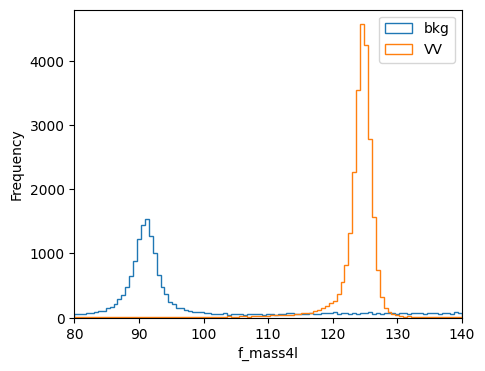

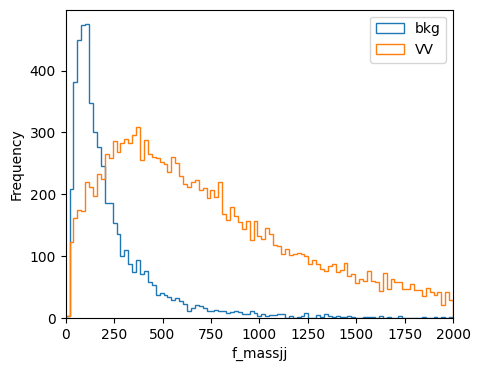

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

VARS=['f_mass4l','f_massjj']

plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VARS[0])
bins = np.linspace(80, 140, 100)
df['bkg'][VARS[0]].plot.hist(bins=bins, alpha=1, label='bkg',histtype='step')
df['VV'][VARS[0]].plot.hist(bins=bins, alpha=1, label='VV',histtype='step')
plt.legend(loc='upper right')
plt.xlim(80,140)

plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VARS[1])
bins = np.linspace(0, 2000, 100)
df['bkg'][VARS[1]].plot.hist(bins=bins, alpha=1, label='bkg',histtype='step')
df['VV'][VARS[1]].plot.hist(bins=bins, alpha=1, label='VV',histtype='step')
plt.legend(loc='upper right')
plt.xlim(0,2000)

plt.show()